**Imports and utilities**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

**Load data**

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,id,query,product_title,product_description,median_relevance,relevance_variance
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4,0.471
3,5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4,0.000
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2,0.471


In [ ]:
df.shape

(10158, 6)

In [ ]:
df = df.drop(['relevance_variance'], axis=1)

In [ ]:
df.shape

(10158, 5)

There are 10158 data points.

**Understanding about the train data**

*   Id
*   Query -- Query text.
*   Product_title -- Product title text.
*   Prodcut_description -- Product description text.
*   Median_relevance -- Median relevance score.

In [ ]:
df.median_relevance.value_counts()

4    6171
3    1737
2    1476
1     774
Name: median_relevance, dtype: int64

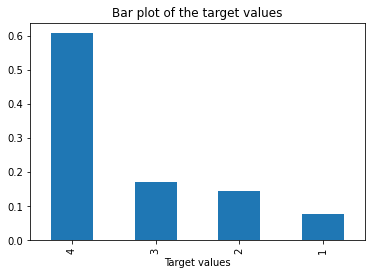

In [ ]:
df['median_relevance'].value_counts(normalize = True).plot(kind='bar')
plt.xlabel("Target values")
plt.title("Bar plot of the target values")
plt.show()

**Analysis:** Data is quiet imbalanced.

In [ ]:
df['median_relevance'].value_counts() / len(df)

4    0.607501
3    0.170998
2    0.145304
1    0.076196
Name: median_relevance, dtype: float64

So our **baseline** to beat is **60%**, which we get if we predict the most common class

In [ ]:
df.isna().sum()

id                        0
query                     0
product_title             0
product_description    2444
median_relevance          0
dtype: int64

**Missing values check:** 2444 values are missing from Product_description

As missing values are only in Product description column we can replace them with empty string and will use Product title only as search relevance measure.

In [ ]:
df.product_description.fillna('', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10158 entries, 0 to 10157
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10158 non-null  int64 
 1   query                10158 non-null  object
 2   product_title        10158 non-null  object
 3   product_description  10158 non-null  object
 4   median_relevance     10158 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 396.9+ KB


In [ ]:
y = df['query'].value_counts().tolist()

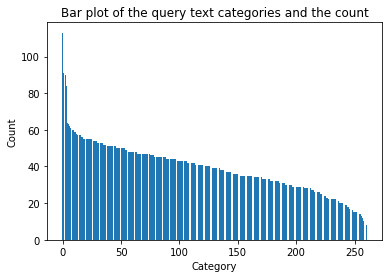

In [ ]:
x = range(len(y))
plt.bar(x, y)
plt.ylabel('Count')
plt.xlabel('Category')
plt.title('Bar plot of the query text categories and the count')
plt.show()

In [ ]:
df['query'].value_counts().head()

wireless mouse         113
rachel ray cookware     91
memory foam pillow      90
bike lock               84
16 gb memory card       64
Name: query, dtype: int64

**Split data into training and test**

In [ ]:
train, test = train_test_split(df,
                               random_state=104, 
                               test_size=0.25, 
                               shuffle=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7618 entries, 9550 to 8261
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7618 non-null   int64 
 1   query                7618 non-null   object
 2   product_title        7618 non-null   object
 3   product_description  7618 non-null   object
 4   median_relevance     7618 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 357.1+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540 entries, 1481 to 9443
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2540 non-null   int64 
 1   query                2540 non-null   object
 2   product_title        2540 non-null   object
 3   product_description  2540 non-null   object
 4   median_relevance     2540 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 119.1+ KB


In [ ]:
train = train.drop(['id'], axis=1).reset_index()

In [ ]:
train = train.drop(['index'], axis=1)

In [ ]:
train = train.reset_index()

In [ ]:
train.rename(columns = {'index':'id'}, inplace = True)

In [ ]:
train.head()

,id,query,product_title,product_description,median_relevance
0,0,zippo hand warmer,"Zippo Black Polish Hand Warmer, with Filling C...",,4
1,1,wall mirrors,Cooper Classics Benedetta Wall Mirrors - 12 di...,The small round shape and shiny nickel finish ...,4
2,2,rachel ray cookware,Rachael Ray Porcelain II Green 10-piece Cookwa...,This versatile 10-piece cookware set from Rach...,4
3,3,flea and tick control for dogs,Hartz UltraGuard Plus Flea and Tick Home Fogge...,details\nThe Hartz UltraGuard Plus Home Fogger...,3
4,4,batman,DC Comics Arkham Asylum Batman Series The Joke...,<ul>\n\t\t<li>\n\t\t\tEnglish \n\t\t\t\t</li>\...,2


In [ ]:
test = test.drop(['id'], axis=1).reset_index()

In [ ]:
test = test.drop(['index'], axis=1)

In [ ]:
test = test.reset_index()

In [ ]:
test.rename(columns = {'index':'id'}, inplace = True)

In [ ]:
test.head()

,id,query,product_title,product_description,median_relevance
0,0,pittsburgh pirates,Fanmats Machine-Made Pittsburgh Pirates Black ...,Show your team pride and add style to your tai...,4
1,1,dish towels,Oasis Cotton Flour Sack Towel (Set of 3),These Flour Sack Towelsoffers the ultimate in ...,3
2,2,portable hard drive,Toshiba Canvio Slim 1 TB External Hard Drive,Toshiba Canvio® Slim II for Mac® Portable Exte...,3
3,3,playstation vita system,Legends Of Chima: Laval's Journey (PlayStation...,Get ready for an epic adventure as Laval races...,2
4,4,galaxy note 3,3M Natural View Screen Protection Film for Sam...,"Helps keep your device screen in pristine, lik...",2


In [ ]:
train.to_csv('train.csv')
test.to_csv('test.csv')